Final Project : S&P500 price prediction 

Vi Nguyen 

The main purpose of this project is using the 2 models : Linear Regression and Random Forest to predict the stock price of the S&P500. The purpose is to compare the two models.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data1 = pd.read_csv("SPX.csv")
df = pd.DataFrame(data1)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1,1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
2,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
3,1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
4,1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...,...,...
23318,2020-10-29,3277.169922,3341.050049,3259.820068,3310.110107,3310.110107,4903070000
23319,2020-10-30,3293.590088,3304.929932,3233.939941,3269.959961,3269.959961,4840450000
23320,2020-11-02,3296.199951,3330.139893,3279.739990,3310.239990,3310.239990,4310590000
23321,2020-11-03,3336.250000,3389.489990,3336.250000,3369.159912,3369.159912,4220070000


Date : the date of the record.
Open: the opening price of the day(when trading starts).
High : The highest trade price during the day.
Low: The lowest trade price during the day.
Close: The closing price for the day (when trading is finished).
Volume: the number of shares traded.
Adj close: the daily closing price, adjusted retroactively to include any corporate actions.

In [3]:
df1 = df.set_index("Date")

<Axes: xlabel='Date'>

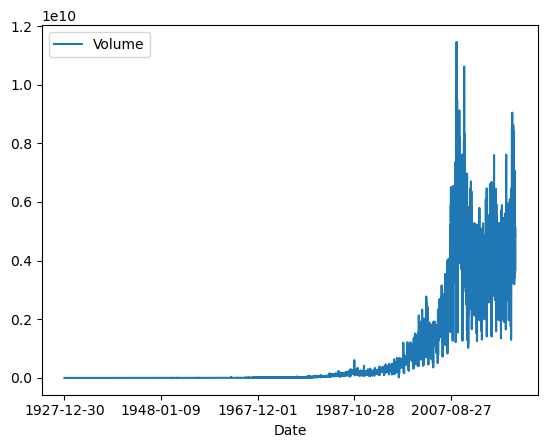

In [4]:
df1.plot.line(y = "Volume", use_index = True)

<Axes: xlabel='Date'>

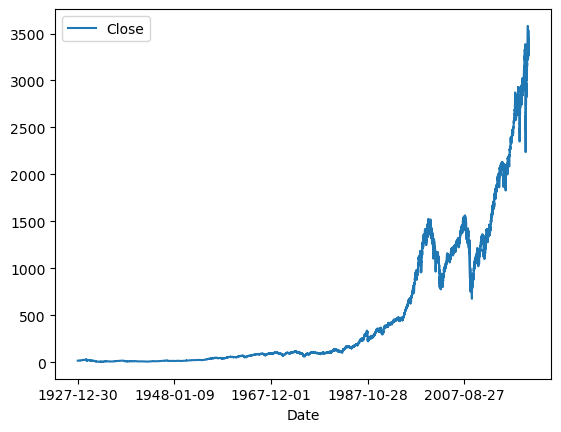

In [5]:
df1.plot.line(y = "Close", use_index = True)

In [ ]:
we can see from the two plots that the volume of share traded is kind of related to the closing price goes up ot down.

Now lets see if we can predict the price goes up when it actually goes up

In [6]:
df1["Tomorrow"] = df1["Close"].shift(-1)
df1

,Open,High,Low,Close,Adj Close,Volume,Tomorrow
Date,,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...,...
2020-10-29,3277.169922,3341.050049,3259.820068,3310.110107,3310.110107,4903070000,3269.959961
2020-10-30,3293.590088,3304.929932,3233.939941,3269.959961,3269.959961,4840450000,3310.239990
2020-11-02,3296.199951,3330.139893,3279.739990,3310.239990,3310.239990,4310590000,3369.159912


In [7]:
df1["Target"] = (df1["Tomorrow"] > df1["Close"]).astype(int)
df1

,Open,High,Low,Close,Adj Close,Volume,Tomorrow,Target
Date,,,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...,...
2020-10-29,3277.169922,3341.050049,3259.820068,3310.110107,3310.110107,4903070000,3269.959961,0
2020-10-30,3293.590088,3304.929932,3233.939941,3269.959961,3269.959961,4840450000,3310.239990,1
2020-11-02,3296.199951,3330.139893,3279.739990,3310.239990,3310.239990,4310590000,3369.159912,1


The TARGET column has 0 and 1 values, in which 1 indicated the price goes up and 0 is when the price goes down.

Now we will remove the data that are too far back because the market may have shift fundamentally and not very useful when it comes to prediction. 

In [8]:
df1.info(verbose = True)


<class 'pandas.core.frame.DataFrame'>
Index: 23323 entries, 1927-12-30 to 2020-11-04
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       23323 non-null  float64
 1   High       23323 non-null  float64
 2   Low        23323 non-null  float64
 3   Close      23323 non-null  float64
 4   Adj Close  23323 non-null  float64
 5   Volume     23323 non-null  int64  
 6   Tomorrow   23322 non-null  float64
 7   Target     23323 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 1.6+ MB


In [9]:
df1 = df1.loc["1990-01-01":].copy()

In [10]:
df1

,Open,High,Low,Close,Adj Close,Volume,Tomorrow,Target
Date,,,,,,,,
1990-01-02,353.399994,359.690002,351.980011,359.690002,359.690002,162070000,358.760010,0
1990-01-03,359.690002,360.589996,357.890015,358.760010,358.760010,192330000,355.670013,0
1990-01-04,358.760010,358.760010,352.890015,355.670013,355.670013,177000000,352.200012,0
1990-01-05,355.670013,355.670013,351.350006,352.200012,352.200012,158530000,353.790009,1
1990-01-08,352.200012,354.239990,350.540009,353.790009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...,...
2020-10-29,3277.169922,3341.050049,3259.820068,3310.110107,3310.110107,4903070000,3269.959961,0
2020-10-30,3293.590088,3304.929932,3233.939941,3269.959961,3269.959961,4840450000,3310.239990,1
2020-11-02,3296.199951,3330.139893,3279.739990,3310.239990,3310.239990,4310590000,3369.159912,1


In [11]:
df1.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Tomorrow     1
Target       0
dtype: int64

In [25]:
#RF model 
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 400, min_samples_split = 100, random_state = 1)
train = df1.iloc[:-100] #first 100 rows for training
test = df1.iloc[-100:] #last 100 rows for testing

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, n_estimators=400, random_state=1)

Random Forest works by randomizing parameters and use them to train a lot of individual decision tree and then average the results from the decision tree. It is harder for Random Forest to overfit than the other models. min_samples_split helps with overfitting. The higher we set the min_sample_split the less accurate it will be but it keep us from overfiting. 

In [26]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0])

In [27]:
preds = pd.Series(preds, index = test.index)
preds

Date
2020-06-16    1
2020-06-17    1
2020-06-18    1
2020-06-19    1
2020-06-22    1
             ..
2020-10-29    1
2020-10-30    1
2020-11-02    1
2020-11-03    1
2020-11-04    0
Length: 100, dtype: int64

In [28]:
precision_score(test["Target"],preds)

0.6724137931034483

In [29]:
combined = pd.concat([test["Target"], preds], axis = 1)
combined

,Target,0
Date,,
2020-06-16,0,1
2020-06-17,1,1
2020-06-18,0,1
2020-06-19,1,1
2020-06-22,1,1
...,...,...
2020-10-29,0,1
2020-10-30,1,1
2020-11-02,1,1


<Axes: xlabel='Date'>

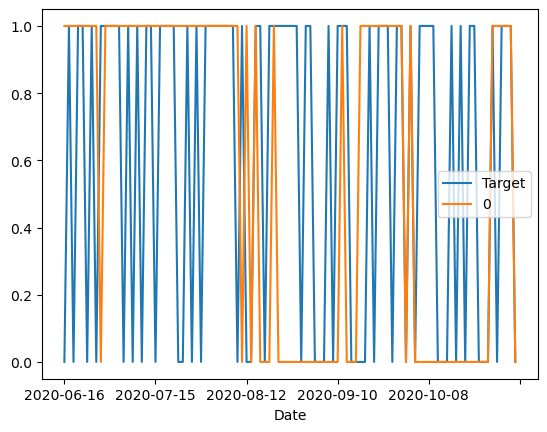

In [30]:
combined.plot()

We do backtesting for a better model for the reality. 

In [31]:
#back testing 
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index = test.index, name = "Predictions")
    combined = pd. concat([test["Target"], preds], axis = 1)
    return combined

In [32]:
def backtest(data, model, predictors, start = 2500, step = 100):
    #take 10 years of data and train the model, train a model for a year then go on the next 10 years
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [33]:
predictions = backtest(df1, model, predictors)


In [34]:
predictions["Predictions"].value_counts()



Predictions
1    2651
0    2622
Name: count, dtype: int64

In [35]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5364013579781215

In [36]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.537265
0    0.462735
Name: count, dtype: float64

In [37]:
horizons = [2,5, 60, 250, 1000]
# calculate the mean close price of the last 2 days,the last trading week, the last 3 months, the last year
#and the last 4 years. 

We give the model more information to make a better prediction.

In [38]:
new_predictors = []
for h in horizons :
    roll_ave = df1.rolling(h).mean()
    ratio = f"Close_ratio_{h}"
    df1[ratio] = df1["Close"]/roll_ave["Close"] #the first loop is today close divide for the rolling average oflast 2 days and so on
    trend = f"Trend_{h}"
    df1[trend] = df1.shift(1).rolling(h).sum()["Target"]
    new_predictors += [ratio, trend]

In [39]:
df1 = df1.dropna(subset = df1.columns[df1.columns != "Tomorrow"])
df1

,Open,High,Low,Close,Adj Close,Volume,Tomorrow,Target,Close_ratio_2,Trend_2,Close_ratio_5,Trend_5,Close_ratio_60,Trend_60,Close_ratio_250,Trend_250,Close_ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,,
1993-12-14,465.730011,466.119995,462.459991,463.059998,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15,463.059998,463.690002,461.839996,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16,461.859985,463.980011,461.859985,463.339996,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17,463.339996,466.380005,463.339996,466.380005,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20,466.380005,466.899994,465.529999,465.850006,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-29,3277.169922,3341.050049,3259.820068,3310.110107,3310.110107,4903070000,3269.959961,0,1.005938,1.0,0.982918,2.0,0.973971,35.0,1.055097,148.0,1.192083,567.0
2020-10-30,3293.590088,3304.929932,3233.939941,3269.959961,3269.959961,4840450000,3310.239990,1,0.993898,1.0,0.982398,1.0,0.962531,34.0,1.042045,147.0,1.177155,566.0
2020-11-02,3296.199951,3330.139893,3279.739990,3310.239990,3310.239990,4310590000,3369.159912,1,1.006121,1.0,0.999950,2.0,0.974584,34.0,1.054564,148.0,1.191165,566.0


In [44]:
model = RandomForestClassifier(n_estimators = 500, min_samples_split = 50, random_state = 1) 

rewrite the predict function by returning the probability of stock price goes up

In [46]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= .6] = 1 #the price has to go >=60% to predict the price goes up
    preds[preds < .6] = 0
    preds = pd.Series(preds, index = test.index, name = "predictions")
    combined = pd.concat([test["Target"], preds], axis = 1)
    return combined

In [47]:
predictions = backtest(df1, model, new_predictors)
predictions["predictions"].value_counts()

predictions
0.0    3508
1.0     765
Name: count, dtype: int64

In [48]:
precision_score(predictions["Target"], predictions["predictions"])

0.5725490196078431

The accuracy score is low but this is what we want in the real world.

In [49]:
predictions["Target"].value_counts()/predictions.shape[0]

Target
1    0.549497
0    0.450503
Name: count, dtype: float64

In [50]:
predictions

,Target,predictions
Date,,
2003-11-14,0,0.0
2003-11-17,0,1.0
2003-11-18,1,1.0
2003-11-19,0,0.0
2003-11-20,1,1.0
...,...,...
2020-10-29,0,0.0
2020-10-30,1,0.0
2020-11-02,1,0.0


<Axes: xlabel='Date'>

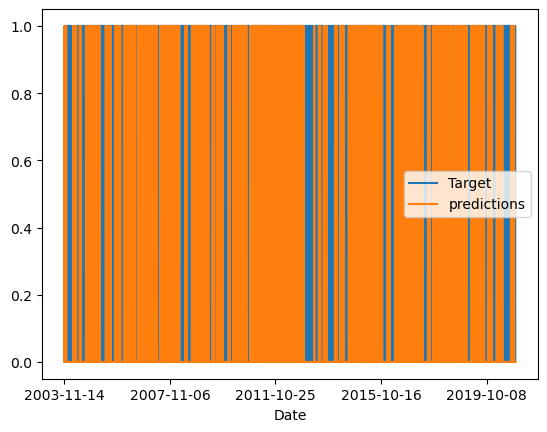

In [51]:
predictions.plot()

Now we will use linear regression model to predict.

In [55]:
#using linear Regression
x = df1[['Open', 'High', 'Low', 'Volume']]
y = df1['Close']

In [58]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.15, shuffle = False, random_state = 0)

In [59]:
#check the observation
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(5757, 4)
(1016, 4)
(5757,)
(1016,)


In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, mean_absolute_error, mean_squared_error
regression = LinearRegression()
regression.fit(train_x, train_y)
print("regression coefficient", regression.coef_)
print("regression intercept", regression.intercept_)

regression coefficient [-6.71137415e-01  8.91380023e-01  7.79671301e-01 -5.31622224e-12]
regression intercept -0.055189047312069306


In [67]:
regression_score = regression.score(test_x, test_y)
regression_score

0.9988465312778699

In [68]:
predicted = regression.predict(test_x)


In [69]:
compare = pd.DataFrame({'Actual_Price': test_y, "Predicted_Price": predicted})
compare

,Actual_Price,Predicted_Price
Date,,
2016-10-24,2151.330078,2152.609066
2016-10-25,2143.159912,2144.919245
2016-10-26,2139.429932,2140.324696
2016-10-27,2133.040039,2137.536875
2016-10-28,2126.409912,2129.503395
...,...,...
2020-10-29,3310.110107,3320.220819
2020-10-30,3269.959961,3256.826221
2020-11-02,3310.239990,3313.258101


<Axes: xlabel='Date'>

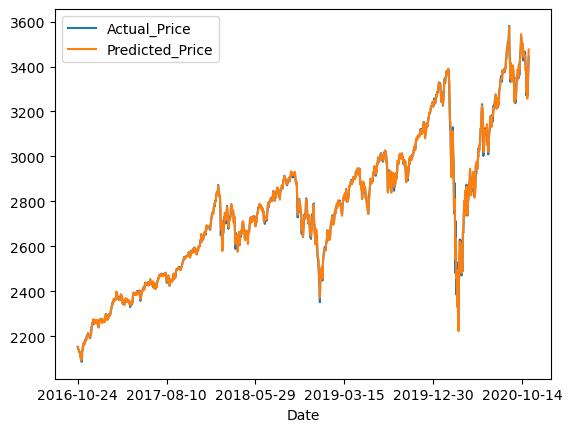

In [70]:
compare.plot()

In [73]:
print('MAE:',mean_absolute_error(test_y, predicted))
print('MSE:', mean_squared_error(test_y, predicted))
print('RMSE: ', np.sqrt(mean_squared_error(test_y, predicted)))

MAE: 6.7636425941270435
MSE: 118.8326772960075
RMSE:  10.901040193303


In [74]:
#model accuracy:
x2 = compare.Actual_Price.mean()
y2 = compare.Predicted_Price.mean()
lin_accuracy = x2/y2*100
lin_accuracy

100.00502380238379

The accuraccy of linear regression is higher compare to random forest but this is not what we need in reality.